In [127]:
import warnings

warnings.warn("deprecated", DeprecationWarning)
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from IPython.html.widgets import interact
from mpl_toolkits import mplot3d

## Data Visualization

The **Data Visualization** and **Techniques for Analyzing Data** parts of the presentations have been written in **Python** and are dispayed in **Jupyter**

<img style="float:left; width:45%" src="http://morganlinton.com/wp-content/uploads/2015/04/python-programming.png"/>

<img style="float:left; width:45%; margin-left:5%" src="http://lambdaops.com/jupyter-environments-odsc2015/pictures/jupyter-logo.png"/>

<br clear="all"/>

### Motivation

* As big data becomes bigger, and more companies deal with complex datasets with dozens of variables, data visualization will become even more important.
* With the rise of data warehouses, delivery of data analysis reports has shifted from print to digital.
* Data Visualization is an important tool when working with data

### Formal Definition

> Visualization is the process that transforms (abstract) data into interactive graphical representations for the purpose of exploration, confirmation, or presentation.

#### Why use Graphics to Visualize Data?

* Figures are richer; provide more information with less clutter and in less space.
* Figures provide the gestalt effect: they give an overview; make structure more visible.
* Figures are more accessible, easier to understand, faster to grasp, more comprehensible, more memorable, more fun, and less formal.

<a href="https://www.youtube.com/watch?v=-hJmjoowwGU">Meditteranian Sea Currents</a>

**Anscombe's quartet**

Anscombe's quartet comprises four datasets that have nearly identical simple statistical properties, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties.

<img style="float:left; width:75%" src="https://camo.githubusercontent.com/859b0bd8625ba6c8f1bb6706bd985189002560b6/687474703a2f2f74682d6d617965722e64652f626f6368756d323031332f696d672f616e73636f6d62655f7461626c652e6a7067"/>

<br clear="all"/>

Source: https://github.com/KartikKannapur/Data-Science-CSCI-E-109/wiki/Anscombe's-Quartet

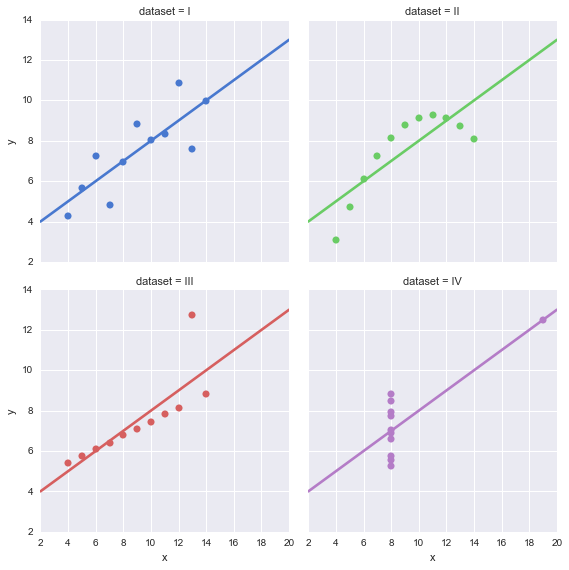

In [66]:
# Example taken from the Seaborn documentation
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1});

### Visualization Fundamentals

#### Data types 

* Quantitative Data
    * Life Expectancy
    * Income Per Person (continious)
    * Total Population (discrete)
* Categorical Data
    * Nominal
        * Geographic Region
        * Gender
    * Ordered
        * Dates
        * Population Bins (0-50 million, 50-100 million...)
        * Class Difficulity (easy, moderate, hard)

#### Visual Encodings

Visual encodings are a mapping from data to display elements. Visual encondings ranked by effectivness:

* Position
* Length
* Orientation
* Size
* Volume
* Color

**Question**: What data types and visual encodings are used in this visualization?

<a href="http://www.gapminder.org/tools/bubbles">Gapminder.org</a> 

#### Position

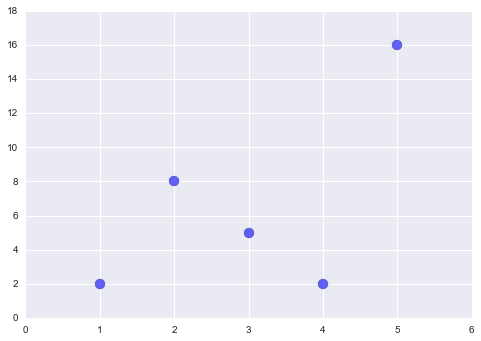

In [71]:
a = 0.6; x = [1, 2, 3, 4, 5]; y = [2, 8, 5, 2, 16]

plt.scatter(x, y, s=100, alpha=a);

#### Length

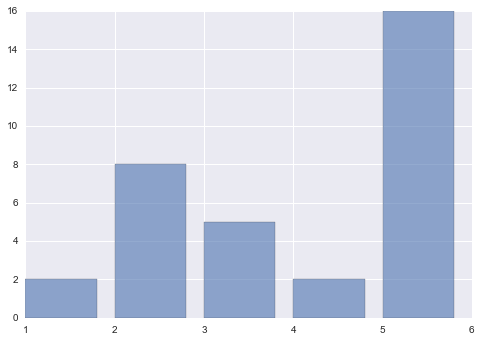

In [72]:
plt.bar(x, y, alpha=a);

#### Direction

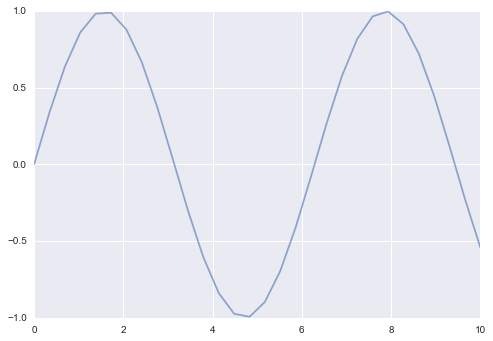

In [73]:
sin = np.linspace(0, 10, 30)

plt.plot(sin, np.sin(sin), alpha=a);

#### Size

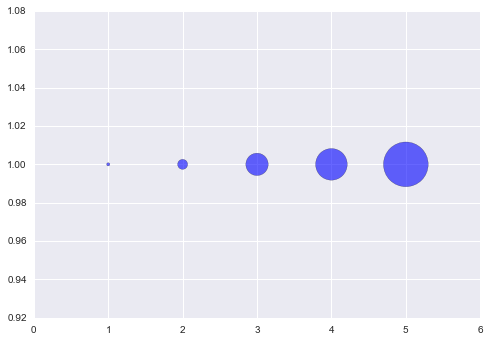

In [74]:
y = [1, 1, 1, 1, 1]; s = [10, 100, 500, 1000, 2000]

plt.scatter(x, y, s=s, alpha=a);

#### Shape 

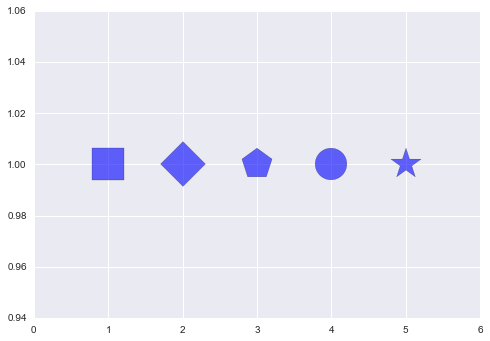

In [75]:
shapes = (',', 'D', 'p', 'o', '*')

for _s, _x, _y in zip(shapes, x, y):
    plt.scatter(_x, _y, marker=_s, s=1000, alpha=a)

#### Categorical Color

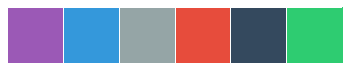

In [76]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

#### Contrast and/or Color Saturation

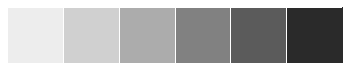

In [77]:
sns.palplot(sns.color_palette("Greys"))

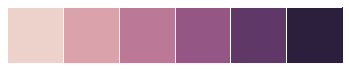

In [78]:
sns.palplot(sns.cubehelix_palette(6))

#### 3D Plots

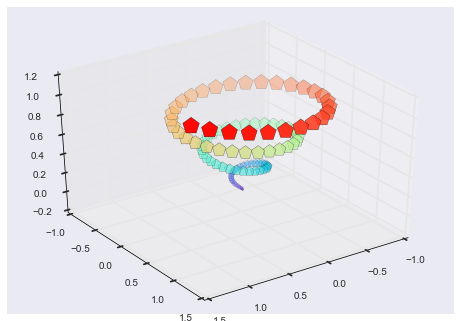

In [67]:
z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)
# Calculate the size
s = z * 300
# Calculate color value
c = z

def plot_3D(elev=20, azim=40, marker = 'o'):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(x, y, z, c=c, s=s, marker=marker, cmap='rainbow');
    ax.view_init(elev, azim)

interact(plot_3D, elev=[0, 90], azim=[0, 90], marker = [',', 'D', 'p', 'o', '*']);

**General rule:** Try to avoid using 3d data visualizations

### Chart Types

There are many different ways data can be visualized. Let's go through a few of the most used chart types. 

<img style="float:left; width:75%" src="http://www.infographicsblog.com/wp-content/uploads/2011/11/chart-suggestion-infographic.jpg"/>

<br clear="all"/>

#### Basic Chart Types

#### Bar Charts

A bar chart or bar graph is a chart that presents grouped data with rectangular bars with lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column bar chart.

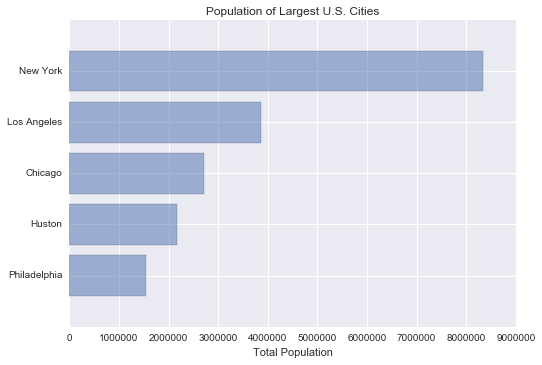

In [201]:
cities = ['Philadelphia', 'Huston', 'Chicago', 'Los Angeles', 'New York']
y_pos = np.arange(len(cities))
population = [1547607, 2160821, 2714856, 3857799, 8336697]

plt.barh(y_pos, population, align='center', alpha=0.5)
plt.yticks(y_pos, cities)
plt.xlabel('Total Population')
plt.title('Population of Largest U.S. Cities');

#### Line Chart

A line chart or line graph is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments It is a basic type of chart common in many fields. It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments. A line chart is often used to visualize a trend in data over intervals of time – a time series – thus the line is often drawn chronologically.

If you have few elements, a bar chart may also work well for time-series. If you have many data points, a line chart is probably better

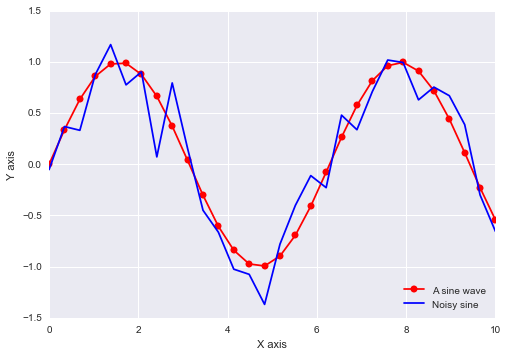

In [81]:
# Array of 30 points from 0 to 10
x = np.linspace(0, 10, 30)
y = np.sin(x)

# Add noise
z = y + np.random.normal(size=30) * .2

plt.plot(x, y, 'ro-', label='A sine wave')
plt.plot(x, z, 'b-', label='Noisy sine')
plt.legend(loc = 'lower right')
plt.xlabel("X axis")
plt.ylabel("Y axis");

#### Scatter Plots

The data is displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. Useful for finding correlation between variables

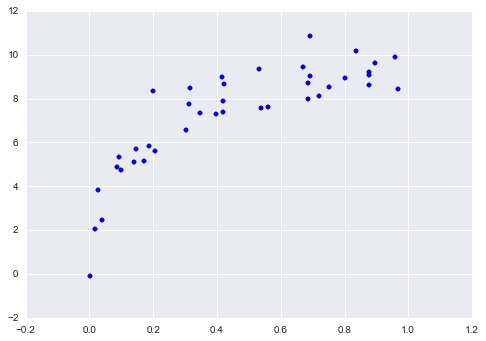

In [82]:
def test_func(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_func(X.ravel(), error)
    return X, y

X, y = make_data(40, error=1)
plt.scatter(X.ravel(), y);

#### Complex Chart Types

Let's take a look at some other interesting chart types

#### Heatmap (Flights)

A heat map is a graphical representation of data where the individual values contained in a matrix are represented as colors. 

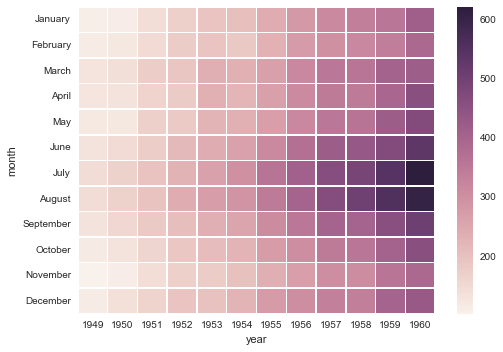

In [83]:
# Example taken from the Seaborn documentation
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights, linewidths=.5)

#### Graphs (Social Networks)

In mathematics and computer science, graph theory is the study of graphs, which are mathematical structures used to model pairwise relations between objects. A graph in this context is made up of vertices, nodes, or points which are connected by edges, arcs, or lines. A graph may be undirected, meaning that there is no distinction between the two vertices associated with each edge, or its edges may be directed from one vertex to another.

<a href="http://evelinag.com/blog/2015/12-15-star-wars-social-network">Star Wars Social Networks</a>

#### Maps (Geographical Data)

A choropleth map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income.

In [175]:
from IPython.display import IFrame
IFrame('http://localhost:8000/', width=1000, height=800)

### Visualizing Multi-Dimensional Datasets

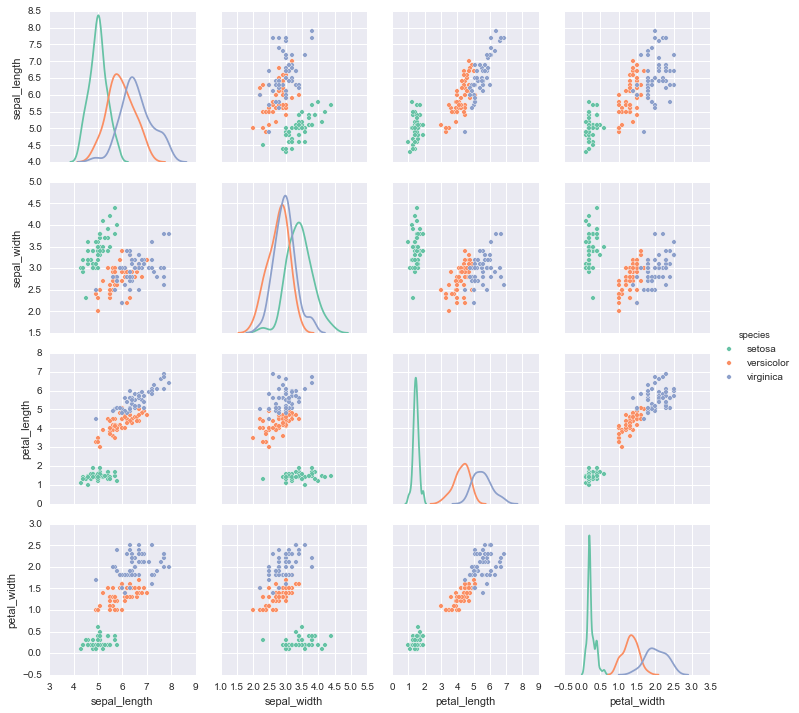

In [23]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)

### Lie Factor

The “Lie Factor” is a value to describe the relation between the size of effect shown in a graphic and the size of effect shown in the data.

## $\text{lie factor} = \frac{\text{Size of the effect shown in the graphics}}{\text{Size of the effect shown in the data}}$

**General Rule**: 0.95 < lie-factor < 1.05

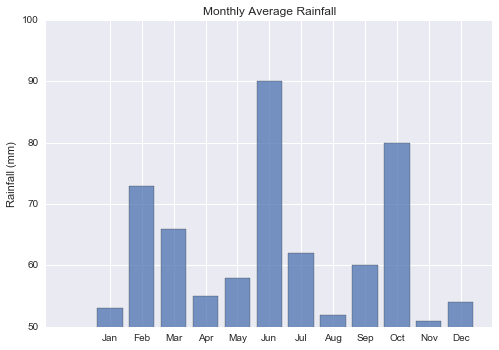

In [205]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
rainfall = [53, 73, 66, 55, 58, 90, 62, 52, 60, 80, 51, 54]
y_pos = np.arange(len(months))

plt.bar(y_pos, rainfall, align='center', alpha=0.75)
plt.xticks(y_pos, months)
plt.ylabel('Rainfall (mm)')
plt.title('Monthly Average Rainfall')
plt.ylim(50, 100);

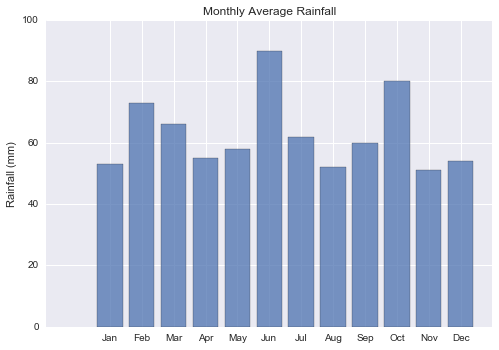

In [206]:
plt.bar(y_pos, rainfall, align='center', alpha=0.75)
plt.xticks(y_pos, months)
plt.ylabel('Rainfall (mm)')
plt.title('Monthly Average Rainfall')
plt.ylim(0, 100);

### Exploratory vs. Explanatory Data Visualizations

When working with data visualization you often encounter the terms **exploratory data analysis** and **explanatory data visualization**. The first could be described as a conversation between you and your data, the latter a conversation between your data and your audience.

#### Exploratory Data Analysis

* Often more practical and simple (we are interested in solving problems)
* Choosing the right tool (chart)

##### Titanic: Practical Example

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

In [26]:
titanic = pd.read_csv("titanic/train.csv")

# display the 5 first rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


**Some Quick Cleaning**

In [70]:
# Lowercase all column names
titanic.columns = [c.lower() for c in titanic.columns]

# Let's keep only the complete records for visualization purposes
df = titanic
df = df.drop(['cabin'], axis=1)
df = df.dropna()

#### Visualizing the features

To get an overview of the dataset, lets plot all the numerical and categorical features

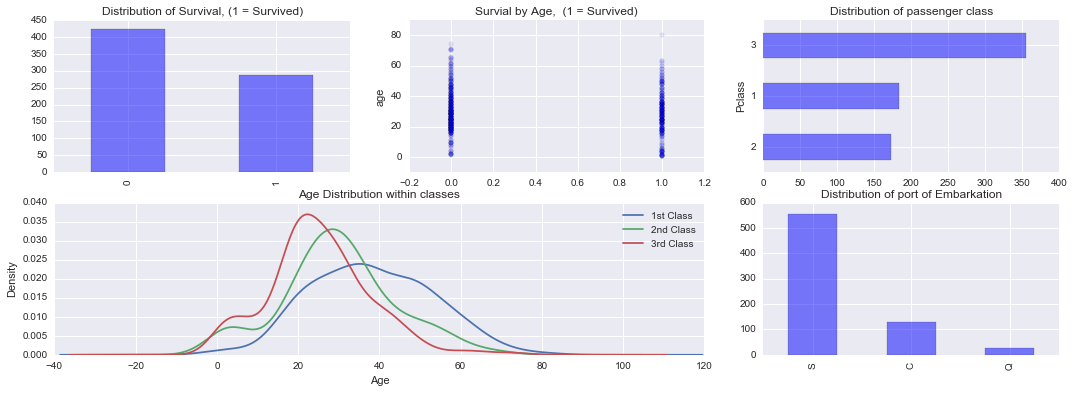

In [71]:
fig = plt.figure(figsize=(18, 6)) 

plt.subplot2grid((2, 3), (0, 0))
df.survived.value_counts().plot(kind='bar', alpha=0.5)
plt.title("Distribution of Survival, (1 = Survived)")

plt.subplot2grid((2, 3), (0, 1))
plt.scatter(df.survived, df.age, alpha=0.1)
plt.ylabel("age")
plt.title("Survial by Age,  (1 = Survived)")

plt.subplot2grid((2, 3), (0, 2))
df.pclass.value_counts(ascending=True).plot(kind='barh', alpha=0.5)
plt.ylabel("Pclass")
plt.title("Distribution of passenger class")
 
plt.subplot2grid((2, 3),(1, 0), colspan=2)
df.age[df.pclass == 1].plot(kind='kde')    
df.age[df.pclass == 2].plot(kind='kde')
df.age[df.pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'), loc='best')

plt.subplot2grid((2, 3), (1, 2))
df.embarked.value_counts().plot(kind='bar', alpha=0.5);
plt.title("Distribution of port of Embarkation");

**We wish to predict whether or not a passenger will survive or not**. We are therefore interested in finding out what information or features can help us determine the probability that a passenger survived or perished.

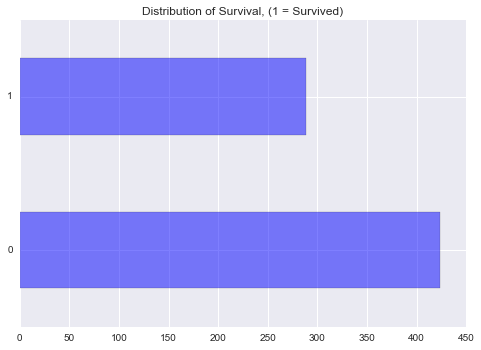

In [72]:
df.survived.value_counts().plot(kind='barh', alpha=.5)
plt.title("Distribution of Survival, (1 = Survived)");

#### Let us start breaking it down by gender

> Women and children first is a historical code of conduct whereby the lives of women and children were to be saved first in a life-threatening situation (typically abandoning ship, when survival resources such as lifeboats were limited).

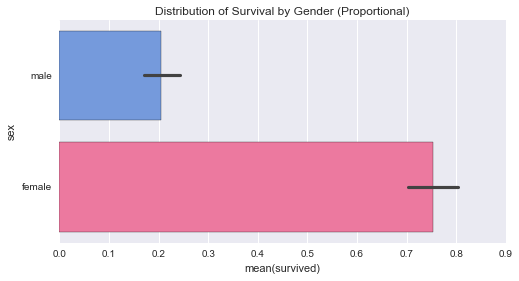

In [73]:
# Custom color palette for our plots
pal = dict(male="#6495ED", female="#FF6699")

plt.figure(figsize=(8, 4))
g = sns.barplot(y="sex", x="survived", data=df, palette=pal, )
plt.title("Distribution of Survival by Gender (Proportional)");

#### Passenger Class

> The Preston curve is an empirical cross-sectional relationship between life expectancy and real per capita income.

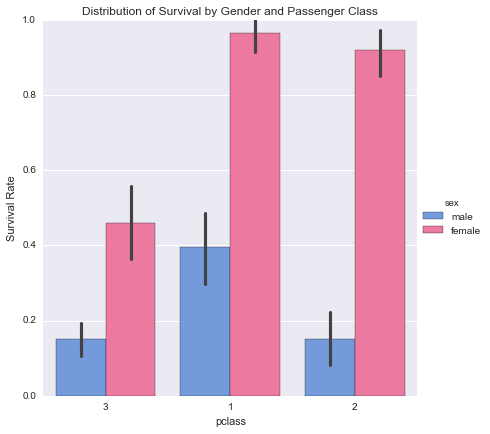

In [74]:
g = sns.factorplot(x="pclass", y="survived", hue="sex", data=df, size=6, kind="bar", palette=pal)
g.set_ylabels("Survival Rate")
plt.title("Distribution of Survival by Gender and Passenger Class");

#### Age

Lets see how the passengers age affected their chance of survival

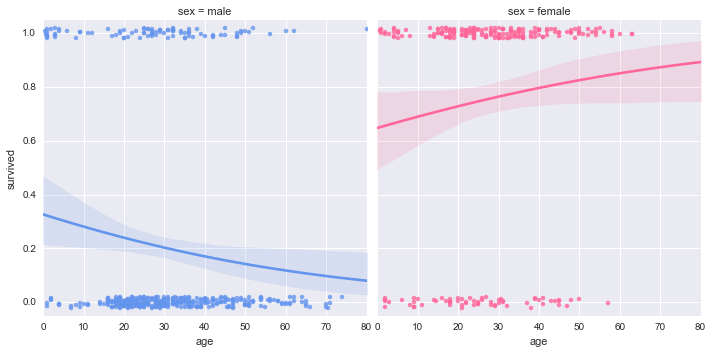

In [76]:
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df, palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05));

### Explanatory Data Visualizations

* Often more creative and elaborate
* This is the kind of visualization you should be finding in presentations, sales reports and news articles.
* Closer to what a dashboard solution would typically offer

##### Examples

* <a href="http://www.nytimes.com/interactive/2012/05/17/business/dealbook/how-the-facebook-offering-compares.html">Facebook IPO</a>
* <a href="http://aprilzero.com/sport/">April Zero</a>

## Techniques for Analyzing Data

### Machine Learning

* Field of study that gives computer the ability to learn without being explicitly programmed.
* First defined in 1959 (why has it become some popular lately?)
* Gartner Identifies the Top 10 Strategic Technology Trends for 2016 (machine learning is mentioned in three of them)
* Machine learning is impacting so many critical industries, including healthcare, education, finance, robotics, artificial intelligence, astronomy, and more. 
* The ability to develop machines and systems that automatically improve, puts machine learning at the absolute forefront of virtually any field that relies on data.

> A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E. -- Tom Mitchell

#### Alpha GO

* First computer program to defeat a top professional Go player in an even match.
* AlphaGo's beat Lee Se-dol 4-1
* There is significant strategy involved in the game
* The number of possible games is vast ($10^{761}$ compared, for example, to the estimated $10^{120}$)
* AlphaGo's algorithm uses a combination of machine learning and tree search techniques, combined with extensive training, both from human and computer play.

<img style="float:left" src="https://gogameguru.com/i/2016/03/AlphaGo-Lee-Sedol-game-3-game-over.jpg"/>

<br clear="all"/>

> "We're very pleased that AlphaGo played some quite surprising and beautiful moves, according to the commentators, which was amazing to see."

### What a deep network thinks about your #selfie

http://karpathy.github.io/2015/10/25/selfie/

### Basic Machine Learning Concepts

* I'll try to do some live code samples where i implement som different models while i try to explain what is happening.
* I'm using the **scikit-learn** package in Python to implement the models
* **Numpy** and **Pandas** (for handling data) and **matplotlib** for visualizations.

#### Supervised Learning: Regression and Classification

In Supervised Learning, we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features. A simple task would be to make a model that can recognize handwritten digits (I'm showing this later).

**More complicated use cases**

- Predicting future results (Regression, Business Forecasting)
- Given a photograph of a person, identify the person in the photo (Classification, Facebook)
- Based on your previously listened songs, create a personal playlist for you (Recommender Systems, Spotify)

##### Regression

One of the simplest examples of regression is fitting a straight line to the data.

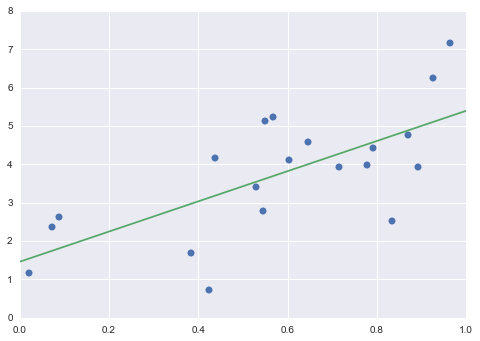

In [114]:
from sklearn.linear_model import LinearRegression

# Generate test data
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

# Plot Data
plt.plot(X.squeeze(), y, 'o')

# Plot Regression line
plt.plot(X_fit.squeeze(), y_fit);

There are also more sophisticated models, which can respond to finer features in the data:

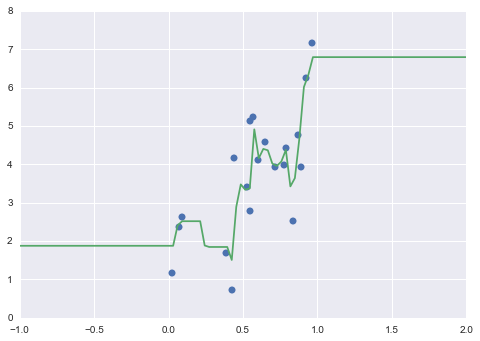

In [116]:
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model
model = RandomForestRegressor()
model.fit(X, y)

X_fit = np.linspace(-1, 2, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

#### Classification
  
  There are many supervised learning algorithms available; here we'll introduce one of the most powerful and interesting methods: Support Vector Machines (SVMs).

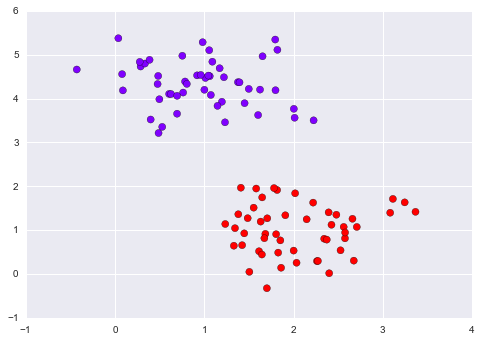

In [78]:
from sklearn.datasets.samples_generator import make_blobs

# Generate isotropic Gaussian blobs for clustering
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.55)

# Plot the data, the label determines the color
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A discriminative classifier attempts to draw a line between the two sets of data. However, it is possible to come up with a large set of lines that separate the clusters successfully. Which of the following lines is the **best** one and **why**?

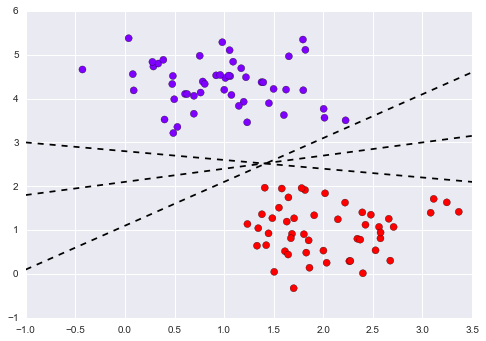

In [79]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

# Our endpoints
xfit = np.linspace(-1, 3.5)

# Three lines that successfully separate the data
for a, b in [(1.0, 1.1), (0.3, 2.1), (-0.2, 2.8)]:
    #Plot the line y = ax + b
    plt.plot(xfit, a * xfit + b, 'k--')

# Limit the x-axis
plt.xlim(-1, 3.5);

Lets see what line a support vector machine would chooce

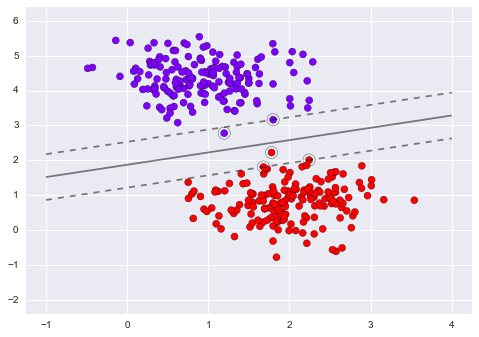

In [125]:
from sklearn.svm import SVC

# Initialize the SVC classifier
clf = SVC(kernel='linear')

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, facecolors='none', zorder=10)
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
def svm_demo(n=70):    
    # Generate isotropic Gaussian blobs for clustering
    X, y = make_blobs(n_samples=n, centers=2, random_state=0, cluster_std=0.55)
    # Fit the SVC classifier
    clf.fit(X, y)
    # Plot data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
    # Plot SVC decision boundary
    plot_svc_decision_function(clf);
    
interact(svm_demo, n=[40, 400]);

### Kernels

Where SVM gets incredibly exciting is when it is used in conjunction with kernels. For the following example it is not possible to linearly separate the data.

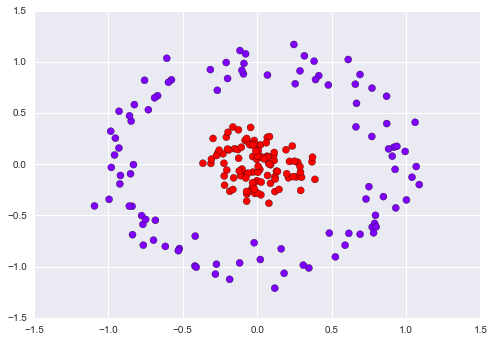

In [84]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(200, factor=.2, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

One way we can adjust this is to apply a kernel, which is some functional transformation of the input data. For example, one simple model we could use is a **radial basis function**

In [85]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

Gives us the following new dataset.

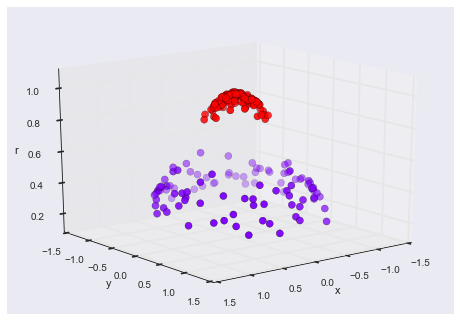

In [86]:
def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='rainbow')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[0, 90], azip=(0, 180));

Lets see how the decision boundry looks like applying the RBF kernel.

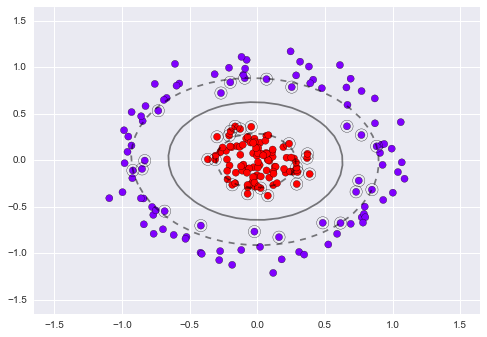

In [87]:
clf = SVC(kernel='rbf').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf);

#### Multi-Class Problem

What then if you have multiple classes? (Give examples)

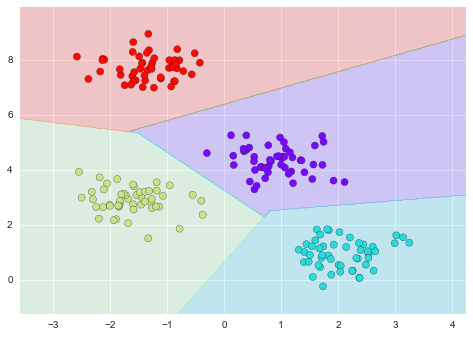

In [88]:
def plot_multi_class(kernel='linear', centers=4):
    X, y = make_blobs(n_samples=200, centers=centers, random_state=0, cluster_std=0.5)
    clf = SVC(kernel=kernel).fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.2)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
interact(plot_multi_class, kernel=['linear', 'poly', 'rbf'], centers=[2, 10])

### Unsupervised Learning: Dimensionality Reduction and Clustering

In machine learning, the problem of unsupervised learning is that of trying to find hidden structure in unlabeled data. Since the examples given to the learner are unlabeled, there is no error or reward signal to evaluate a potential solution.

#### Clustering

> Clustering is the process of examining a collection of “points,” and grouping
the points into “clusters” according to some distance measure.

The goal is that points in the same cluster have a small distance from one another, while points in different clusters are at a large distance from one another.

**Example use-cases**

* Find groups of similar users/customers based on their browsing habits (Marketing, Ads)
* Given a mixture of two sound forces, for example a person talking over another and separate the two (Blind source separation problem)
* Given your cellphone customers location, predict the best place to build new cell towers.

#### K-means Clustering

k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

1.  Guess some random centers
2.  Do until convergence
    * Assign points to the nearest cluster center
    * Set the cluster centers to the mean

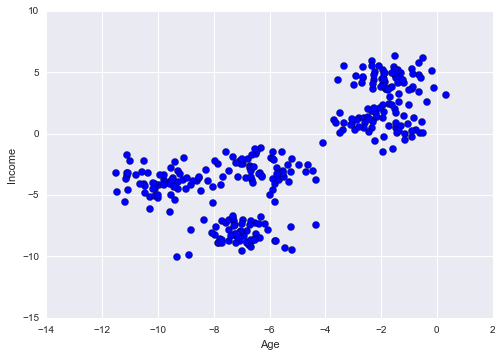

In [126]:
from sklearn.datasets.samples_generator import make_blobs

# Generate clusters
X, y = make_blobs(n_samples=300, centers=5, random_state=1, cluster_std=0.90)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.xlabel("Age")
plt.ylabel("Income");

You can probably see from the data that we have five different clusters. Lets implement K-Means and see the result when varying the number of predifined clusters.

Cluster Centers
[[-6.22074264 -2.89531205]
 [-1.62725717  4.48955683]
 [-7.01671969 -8.16207374]
 [-9.80087983 -3.97148486]
 [-2.06028394  0.88197379]]


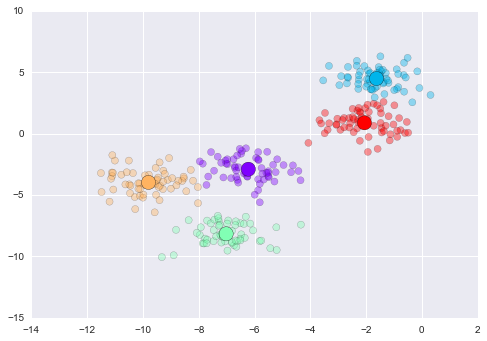

In [118]:
from sklearn.cluster import KMeans

def plot_clusters(num_clusters=2):
    # KMeans with 4 Clusters
    k_means = KMeans(num_clusters)
    # Fit the model on the attributes
    k_means.fit(X)
    # Predict the labels for each point
    y_pred = k_means.predict(X)
    # Get the cluster centers
    mu = k_means.cluster_centers_
    # Plot the result
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='rainbow', alpha=0.4);
    plt.scatter(mu[:, 0], mu[:, 1], s=200, c=np.unique(y_pred), cmap='rainbow')
    print("Cluster Centers")
    print(mu)

interact(plot_clusters, num_clusters=[1, 10]);

## Reason: Validation and Model Selection

One of the most important pieces of machine learning is <b>model validation</b>: that is checking how well your model performs or fits a particular dataset. This is often referred to as **offline validation**. **Online validation** refers to online experiments designed to measure the true performance of your model such as e.g. **A/B-testing**.

Lets look at a practical example using the famous MNIST handwritten digit dataset.

In [10]:
# Load the digits dataset
digits = pd.read_csv("data/train.csv")[:5000]

# Extract the feature and label values
X = digits.iloc[:,1:].values
y = digits[[0]].values.ravel()

digits.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualizing the Digits

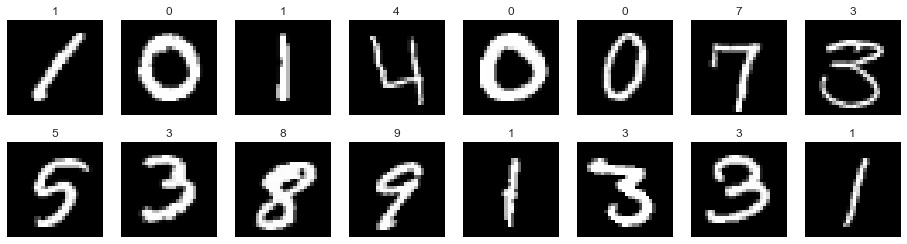

In [11]:
def plot_digits(img, labels, nrows, ncols, colors=[]):
    plt.figure(figsize=(min(16, ncols*2), min(16, nrows*2)))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i+1)
        # Reshape every image to a square array 2d array
        sqrt = np.sqrt(len(img[i]))
        digit = img[i].reshape(sqrt, sqrt)
        plt.imshow(digit, interpolation='nearest', cmap=plt.cm.gray)
        plt.xticks([]); plt.yticks([])
        plt.title(labels[i])

plot_digits(X, y, 2, 8) 

### Validation Sets

To assess how well our model performs we cannot test our model on the same data that was used for training. <b>This is generally not a good idea</b>. If we optimize our estimator this way, we will tend to over-fit the data: that is, we learn the noise.

A better way to test a model is to use a hold-out set which doesnt enter the training.

#### Hold-Out Dataset

Split the dataset into two parts:

* **Training Set** used to train the classifier
* **Validation/Test Set** used to estimate the error rate of the classifier

In [12]:
from sklearn.cross_validation import train_test_split

# Generate a 75:25 hold-out dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape

((3750, 784), (1250, 784))

#### Test Set

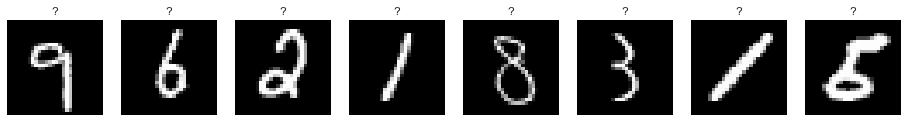

In [13]:
plot_digits(X_test, ['?'] * 8, 1, 8) 

#### Predict labels for our test set

We can now use classifier to predict the labels for our test set

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the RF model
clf.fit(X_train, y_train)

# Predict labels for our hold-out dataset
y_pred = clf.predict(X_test)

# Calculate the accuracy by checking the results against our hold-out dataset labels
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

1168 / 1250 correct


#### Visualizing the predictions

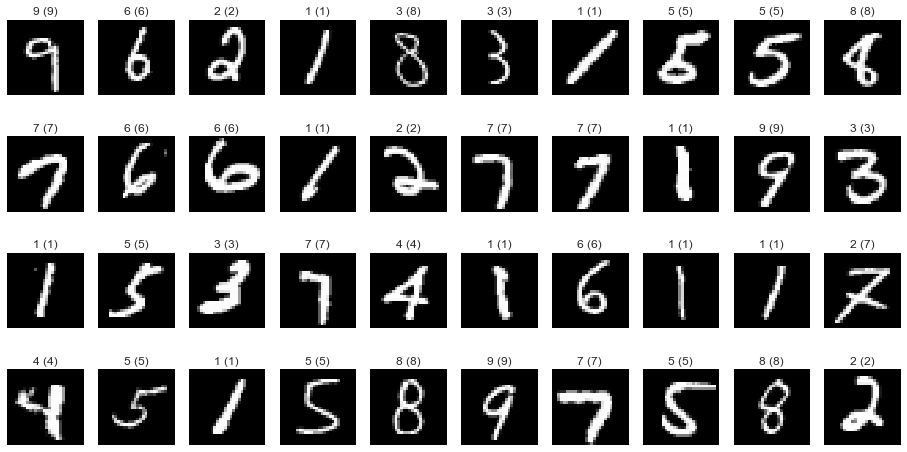

In [15]:
# Flatten our digits so they play nicely with my plot function
digits = [x.flatten() for x in X_test]; labels = []

# Generate labels with both the predicted and true value
for pred, test in zip(y_pred, y_test):
    labels.append(str(pred) + " (" + str(test) + ")")

plot_digits(digits, labels, 4, 10)

A confusion matrix can give us more information about our models performance. More specifically how well our model is at predicting the differnet label values

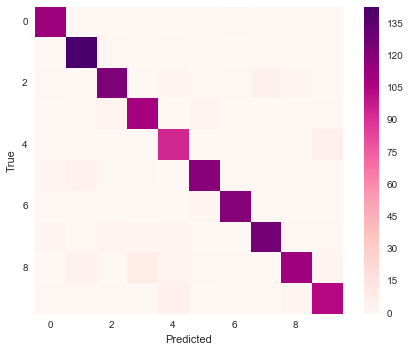

In [16]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap='RdPu', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('True')
plt.xlabel('Predicted');

The model generally predicts the correct label. However we can see that the model some times misses on:

* 2 and 7
* 3 and 8
* 4 and 9

#### K-Fold Cross-Validation

One of the main problems with validation sets is that you "lose" some of the data. Above we only used 75% of the data for training and 25% for validation. Another option is to use K-fold cross-validation where you split the data into k subsets and and the holdout method is repeated k times, where each chunk gets a turn as the validation set. Then the average error across all k trials is computed.

In [22]:
from sklearn.cross_validation import cross_val_score

#Perform 10-fold cross validation
cv = cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv=10)

print("Cross Validation Scores")
print(cv)
print()

print("Mean Score")
print(cv.mean())

Cross Validation Scores
[ 0.92445328  0.93439364  0.93836978  0.93836978  0.93824701  0.93612774
  0.93386774  0.92152918  0.94949495  0.93927126]

Mean Score
0.935412435265


This will give us an even better idea of how well our model is doing. The **evaluation metric** chosen depends on what type of problem you are trying to solve. Are you predicting housing prices or how well a playlist on spotify is you need to use other metrics.

### Overfitting, Underfitting and Model Selection

One of the most important pieces of machine learning is model validation: that is, checking how well your model fits a given dataset. But there are some pitfalls you need to watch out for.

#### Illusatration of Bias-Variance Tradeoff

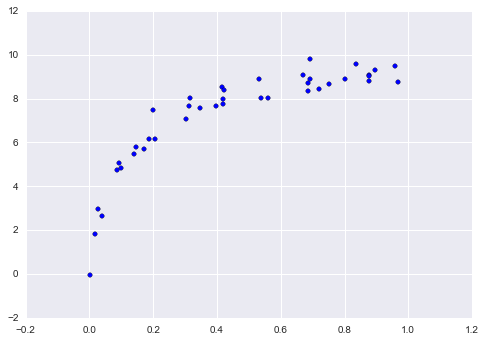

In [110]:
def test_func(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_func(X.ravel(), error)
    return X, y

X, y = make_data(40, error=0.5)

#Plot the data
plt.scatter(X.ravel(), y);

#### Fitting a straight line

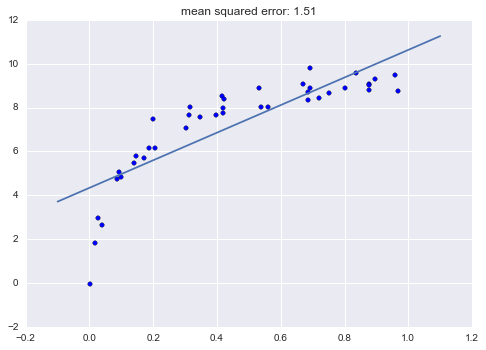

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

model = LinearRegression()
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X, y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)));

We have a straight line to the data, but clearly this model is not the best choice. We can say that this model is biased and under-fits the data. Lets try to improve our results by creating a slighty more complex model.

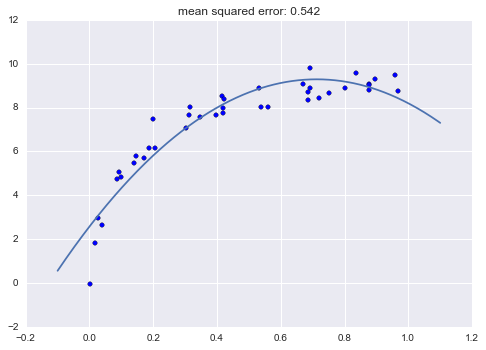

In [112]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

model = PolynomialRegression(2)
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X, y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)));

As you can see this reduced the square error, and makes a much better fit. 

What happens if we use an even more complex model?

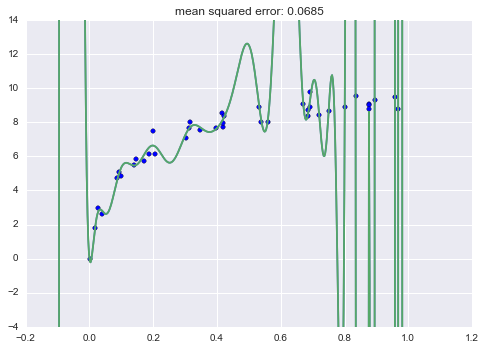

In [113]:
def plot_regression(r=20, plot_y=False):
    model = PolynomialRegression(r)
    model.fit(X, y)
    y_test = model.predict(X_test)
    plt.scatter(X.ravel(), y)
    plt.plot(X_test.ravel(), y_test)
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))
    plt.ylim(-4, 14)
    plt.plot(X_test.ravel(), y_test);
    if plot_y:
        plot_true_y()
    
def plot_true_y():
    x = np.arange(0, 1, 0.02);
    # The real y function
    y = 10 - 1. / (x + 0.1)
    plt.plot(x, y, '--')

interact(plot_regression, r=[1, 100], plot_y=False);

When we increase the degree to this extend, it is clear that the result no longer reflect the underlying distribution, but is more sensitive to the noise in the training data. For this reason, we call it a high-variance model, and we say that it over-fits the data.

<img style="float:left; width:50%" src="http://zhangjunhd.github.io/assets/2014-10-01-bias-variance-tradeoff/1.png"/>

<br clear="all"/>

Source: http://zhangjunhd.github.io/2014/10/01/bias-variance-tradeoff.html

#### Summary

* When underfitting the data you have typically too little data or not given your model enough freedom.
* If you give your model too much freedom it might **learn the data**, including the noise instead off the underlying distribution and overfit the data.
* You should therefore aim for the **sweetspot** between the two...

## Closing Remarks

* Cool Community
* The market will be needing more data scientists (McKinsey Report)
* Questions?